In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import bisect,minimize,linprog
from OptAI_support import profitDS,funplot2d

## Univariate Problems

**a)** <br>
For which of these can gradient-based methods be used reliably, when are gradient-free methods better? Why?

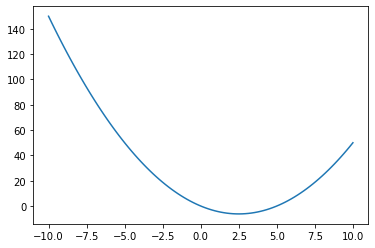

In [2]:
def f1(x):
    return x**2 - 5*x
x1=np.linspace(-10,10,100) #the range will be between -10 and 10
y=f1(x1)
plt.plot(x1,y)

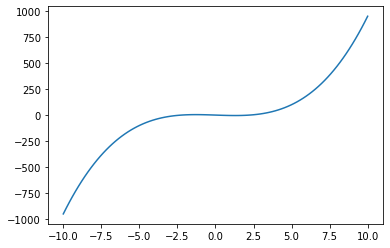

In [3]:
def f2(x):
    return x**3-5*x
x2=np.linspace(-10,10,100)
y2=f2(x2)
plt.plot(x2,y2)

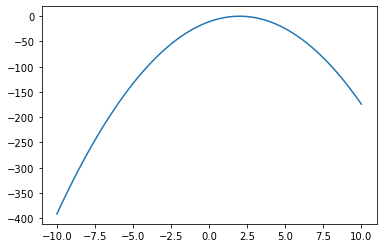

In [4]:
e=math.e
def f3(x):
    return e*(-(x-2)**2)
x3=np.linspace(-10,10,100)
y3=f3(x3)
plt.plot(x3,y3)

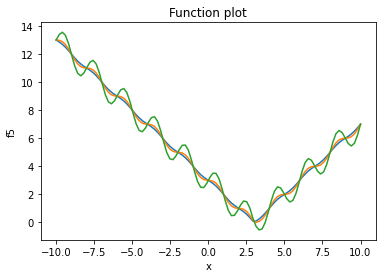

In [5]:
#create an array of x-values from -5 to 10 with a step of 0.1
x4=np.linspace(-10,10,100)
#calculate the corresponding y-values for each x using the abs value function
y4=np.abs(x4-3) #because the function is f(x)=!x-3!
#f5(𝑥)= |𝑥−3| + 𝑏·sin(𝜋·𝑥) with 𝑏∈{0.1, 0.3, 1}
#define the function as it is.
def f5(x4,b):
    return y4+b*np.sin(np.pi*x4)
b = [0.1, 0.3, 1]
#plot for every b value
for i in b:
    plt.plot(x4,f5(x4,i),label='b={}'.format(b))
#axis labels and title
plt.xlabel('x')
plt.ylabel('f5')
plt.title('Function plot')
plt.show()

Taking into account the plots for f1, f2 and f3, we can say that there is no multiple local minimun for each one, so we can say that is reliably to use gradient-based methods.But for f5, is visually remarkable that exists many multiple local minimun, so is not possible to use gradient-based methods.

when are gradient-free methods better? Why?
1. Optimization of black-box functions: When the objective function is a black-box, meaning that it is a function with unknown mathematical structure, gradient-free methods can be more appropriate. For instance, in evolutionary algorithms or swarm intelligence methods, the objective function is evaluated using a fitness function, which is not necessarily differentiable.

2. Discontinuous functions: When the objective function is discontinuous, gradient-based methods may not be applicable. For example, the Rosenbrock function is a continuous but non-differentiable function that has been used as a benchmark in optimization. In this case, gradient-free methods such as the Nelder-Mead method or the simulated annealing method can be used to find the global minimum.

3. High-dimensional optimization problems: As the number of dimensions of the optimization problem increases, gradient-based methods may become less efficient due to the computational cost of computing gradients in high-dimensional spaces. Gradient-free methods such as particle swarm optimization or genetic algorithms can be more efficient in such cases.

4. Noisy functions: In some cases, the objective function may be affected by stochastic noise, making gradient-based methods less effective. Gradient-free methods such as the Bayesian optimization or the covariance matrix adaptation evolutionary strategy (CMA-ES) can be used to optimize noisy functions.

5. Optimization with constraints: In optimization problems with constraints, gradient-free methods can be more suitable than gradient-based methods because they do not require the computation of gradients of the constraint functions. For instance, in constrained optimization problems such as in engineering design or finance, genetic algorithms or pattern search methods are often used.


**b)** Which of these cases can reliably be solved with gradient-based methods, which ones with gradient-free methods?


In [6]:
combination = ['aaa', 'abc', 'bbc', 'cbc']

We need to consider the differentiability of the profit function with respect to price p. If the function is differentiable, gradient-based methods can be used to find the maximum or minimum. <br>For the cases 'aaa', 'abc', and 'bbc', the profit function is differentiable with respect to p, and therefore gradient-based methods can be used to find the maximum or minimum. However, for the case 'cbc', the profit function is not differentiable at p=0, and therefore gradient-free methods may be more appropriate.

To visualize the profit for prices in the range [0.1, 20], we can use the provided funplot2d function as follows: 

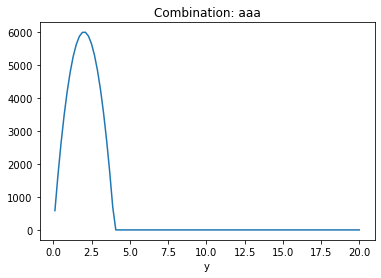

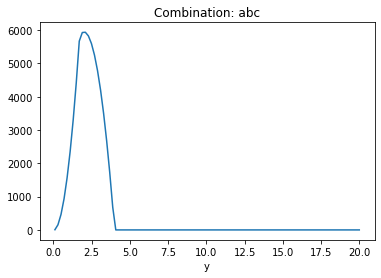

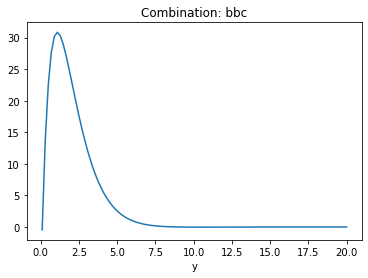

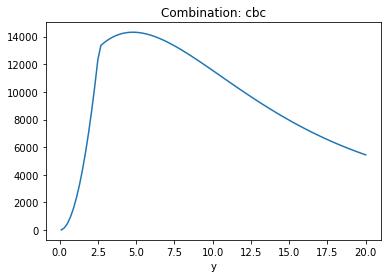

In [7]:
#def profitDS(p,comb='aaa')
for comb in combination:
    funplot2d(lambda p:profitDS(p,comb),[0.1,20])
    plt.title(f"Combination: {comb}")
    plt.show()

**c)** The objective is to maximize the profit by finding the optimal price

**1) the Bisection method with initial range [0.1, 20]**

In [8]:
#we want maximize the profit.
#1. Function that calculates the negative profit as a function of price:
#maximum of the negative profit(which means the minimum of the profit itself)

Combination: aaa
Upper bound 20 is a root for combination 'aaa'
Combination: abc
Upper bound 20 is a root for combination 'abc'
Combination: bbc
Upper bound 20 is a root for combination 'bbc'
Combination: cbc
Upper bound 20 is a root for combination 'cbc'


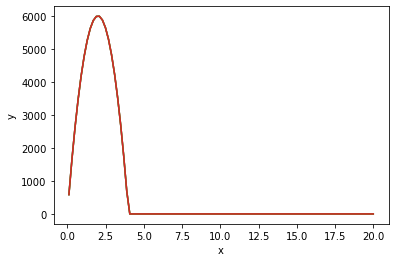

In [9]:

def funplot2d_bisection(f, comb, x=[-5, 5], tol=1e-6):
    if len(x)==2:
        X = np.linspace(x[0],x[1], 101)
    else:
        X = np.array(x)
    Y = np.vectorize(f)(X)

    plt.plot(X,Y)
    plt.xlabel('x')
    plt.ylabel('y')

    # Check if Bisection method works for the given function
    if np.all(np.diff(np.sign(Y)) == 0):
        print(f"No sign change for combination '{comb}'")
        return
    if np.all(Y > 0) or np.all(Y < 0):
        print(f"No roots found for combination '{comb}'")
        return
    if Y[0] == 0:
        print(f"Lower bound {x[0]} is a root for combination '{comb}'")
        return x[0]
    if Y[-1] == 0:
        print(f"Upper bound {x[1]} is a root for combination '{comb}'")
        return x[1]

    # Apply Bisection method
    a, b = x[0], x[1]
    while (b-a)/2 > tol:
        c = (a + b) / 2
        if np.sign(f(a, comb)) == np.sign(f(c, comb)):
            a = c
        else:
            b = c

    # Plot optimal solution
    plt.plot(c, f(c, comb), 'ro')
    plt.show()

    return c



x2=[0.1, 20]
for comb in combination:
    print(f"Combination: {comb}")
    funplot2d_bisection(profitDS, comb,x2)

The code includes a check to determine if the bisection method will work for the given function. If there is no sign change in the function or if all values of the function have the same sign, then the bisection method will not work. If the lower or upper bounds of the search range are already roots of the function, then the bisection method will also not work. If any of these conditions are correct, the code will print a message indicating that the bisection method will not work for the given combination and will return without attempting to find the root.

**2) Newton’s method with starting point x0 = 1**  
Newton's method can converge faster than the bisection method for well-behaved functions, but it can also be more sensitive to the choice of initial guess and may fail to converge if the function is not well-behaved.  
To use Newton's method to maximize the profit by finding the optimal price, you would need to find the critical point of the profit function and then iteratively refine the guess using the update rule for Newton's method. 

In [10]:
#1. To define the profit function as a function of price p:
#first and second deriv.
def fd_profit(p,m):
    h=0.00001
    return (profitDS(p+h,m)-profitDS(p-h,m))/(2*h)
def sd_profit(p,m):
    h=0.00001
    return (profitDS(p+h,m)-2*profitDS(p,m)+profitDS(p-h,m))/h**2
#updating the rule for Newton's method
def new_newton(p,m):
    return (p-fd_profit(p,m)/sd_profit(p,m))
#to implement Newton using the starting point

x0=1##################this is according to the problem###################
tolerance=0.00001
max_iterations=1000

for m in combination:
    print(f'comb_list:{m}')
    x=x0
    for i in range(max_iterations):
        x_new=new_newton(x,m)#intial point
        if abs(x_new-x)<tolerance:
            break
        x=x_new
    print('Optimal prize:',x)
    print('Profit at optimal price:',profitDS(x,m))#beneficio al precio optimo
    

comb_list:aaa
Optimal prize: 1.9999984487985594
Profit at optimal price: 5999.999999996391
comb_list:abc
Optimal prize: 0.03149802065772992
Profit at optimal price: -5.952753944880654
comb_list:bbc
Optimal prize: 1.08606074237931
Profit at optimal price: 30.849429942131742
comb_list:cbc
Optimal prize: 0.03149802065772992
Profit at optimal price: -5.952753944880654


If the Profit at optimal price is negative, it means that selling the product at that price will result in a loss rather than a profit. In the case of comb_list 'cbc', the optimal price is found to be 0.03149802065772992, which means that the product should be sold at this price to maximize profit. However, when the product is sold at this price, the cost of production may exceed the revenue generated, resulting in a negative profit.  
The optimal price of 0.03149802065772992 suggests that the products may need to be priced very low to attract customers, but even then, the total revenue generated from the sales may not be enough to cover the production costs, resulting in a negative profit. In this case, it may be necessary to re-evaluate the production costs or consider other strategies to increase demand and profitability.

**3) Nelder-Mead with starting point x0=1.**

In this code, neg_profit is already returning the negative of profitDS. Therefore, the final output of priceOpt should already be the positive optimal price that maximizes the profit. In other words, maximizing profit is equivalent to minimizing negative profit.

Adding the negative sign to the profitDS function as -profitDS(p, comb) is one way to maximize the profit. However, since the minimize function from scipy.optimize minimizes a function, taking the negative of the profit function turns the problem of maximizing profit into minimizing negative profit. 

So in this case, -res.fun gives the negative of the maximum profit, and adding a negative sign to it again gives the actual maximum profit.

In [27]:
#We have to define the negative of the function as the objective function and use the "minimize" function with the "Nelder-Mead" method. The negative is because the "minimize" function minimizes by default.
#We ca use the def neg_profit from the Bisection method.
#neg_profit(p, comb='aaa')
def neg_profitDS(p, comb):
    return -profitDS(p, comb)
for comb in combination:
    print(f"Combination: {comb}")
    res = minimize(neg_profitDS, x0=1.0, method='Nelder-Mead', args=(comb,))
    priceOpt = res.x[0]
    profitOpt = -res.fun
    print(f"Optimal Price: {priceOpt:.4f}")
    print(f"Profit at Optimal Price: {profitOpt:.4f}\n")


Combination: aaa
Optimal Price: 2.0000
Profit at Optimal Price: 6000.0000

Combination: abc
Optimal Price: 2.0046
Profit at Optimal Price: 5945.2590

Combination: bbc
Optimal Price: 1.0860
Profit at Optimal Price: 30.8494

Combination: cbc
Optimal Price: 4.7793
Profit at Optimal Price: 14321.0614



Nelder-Mead method is a direct search method that works by iteratively replacing the worst point in the current simplex (a set of points that define the search space) with a new point and then reflecting, expanding, or contracting the simplex based on the result. Nelder-Mead method is a more complex method that can be faster for smooth functions that have a single global minimum, but it does not guarantee convergence to the global minimum and can be sensitive to the initial simplex.

**Are all methods able to find the maximum?** <br>

The Bisection, Newton and Nelder-Mead methods are not specifically designed to
find the maximum of a function, but in general to find the root or minimum of a
function. However, they can be adapted to find the maximum by minimising the
negative of the function, depending of the specifications and characteristics of the
problem and functions

**What are potential shortcomings?**<br>
Bisection method: requires a function that is continuous and changes sign over the interval, which may not be the case. It can be considered a slow method for finding
the root or minimum.<br>
<br>
Newton's method: Requires a function to be differentiable. May converge slowly or
not at all if the initial guess is not close enough to the root or minimum.<br>
<br>
Nelder-Mead method: Heuristic method, does not make use of derivatives, which can
be an advantage in some cases. Although it can converge slowly, i.e. get stuck in
local optima, especially in high-dimensional problems.

**d) For Newton and Nelder-Mead: Does the starting point make a difference? What, if
x0=3 or x0=15?**

#NEWTON
Replacing in a very simple way X0, the values change in both methods, so that means the starting point can make a difference in both. In Newton's method x0 can affect the convergence rate and maybe lead to non-converging solution. Normally, starting too close to the optimal value will result in faster convergence, while starting too far away from it may result in divergent or slower convergence. For example, starting at x0=3 and x0=15 may result in converging to different optimal values or not converging at all if the initial estimates are too far from the actual optimal values.

Also in the Nelder-Meade method, the starting point can affect the speed of convergence and the quality of the solution. If the starting point is not chosen carefully, the algorithm may converge to a local optimum instead of a global optimum. In general, it is recommended to check several starting points and compare the results to find the global optimum; starting at x0=3 or x0=15 may give different optimum values depending on the function to be optimised and the shape of the optimisation.
<br>
<br>
With price 1 and 3 is the same, but with 15 them change in all the variation starting points.
It changes with 1, 3 and 15 respectively in each case like this:


Combination: aaa
Optimal Price: 2.0000
Profit at Optimal Price: 6000.0000

Combination: aaa
Optimal Price: 2.0000
Profit at Optimal Price: 6000.0000

Combination: aaa
Optimal Price: 15.0000
Profit at Optimal Price: 0.0000



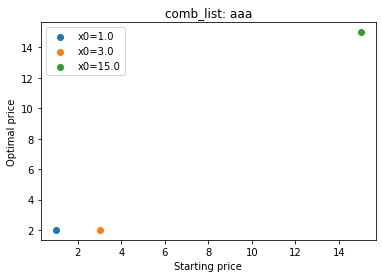

Combination: abc
Optimal Price: 2.0046
Profit at Optimal Price: 5945.2590

Combination: abc
Optimal Price: 2.0046
Profit at Optimal Price: 5945.2590

Combination: abc
Optimal Price: 15.0000
Profit at Optimal Price: 0.0000



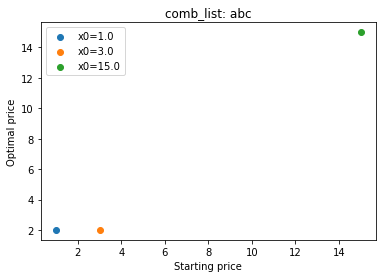

Combination: bbc
Optimal Price: 1.0860
Profit at Optimal Price: 30.8494

Combination: bbc
Optimal Price: 1.0860
Profit at Optimal Price: 30.8494

Combination: bbc
Optimal Price: 782.2500
Profit at Optimal Price: 0.0000



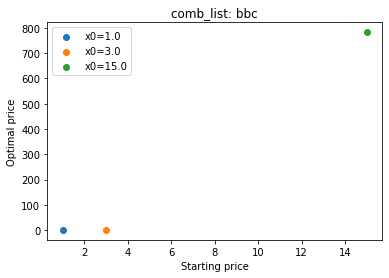

Combination: cbc
Optimal Price: 4.7793
Profit at Optimal Price: 14321.0614

Combination: cbc
Optimal Price: 4.7793
Profit at Optimal Price: 14321.0614

Combination: cbc
Optimal Price: 4.7793
Profit at Optimal Price: 14321.0614



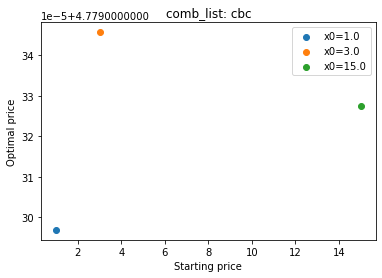

In [29]:
# PLOTING NELDER MEAD

def optimize_price(x0, z):
        res = minimize(neg_profitDS, x0, method='Nelder-Mead', args=(z,))
        priceOpt = res.x[0]
        profitOpt = -res.fun
        print(f"Combination: {z}")
        print(f"Optimal Price: {priceOpt:.4f}")
        print(f"Profit at Optimal Price: {profitOpt:.4f}\n")
        return priceOpt, profitOpt

#comb_list = ['aaa', 'abc', 'bbc', 'cbc']
x0_list = [1.0, 3.0, 15.0]

for z in combination:
    plt.figure()
    plt.title(f"comb_list: {z}")
    for x0 in x0_list:
        priceOpt, profitOpt = optimize_price(x0, z)
        plt.scatter(x0, priceOpt, label=f"x0={x0:.1f}")
    plt.legend()
    plt.xlabel("Starting price")
    plt.ylabel("Optimal price")
    plt.show()

## Linear Programming


Draw the feasible regions and solve graphically and with the simplex algorithm:

**a) What are the optimal solutions?**

In [30]:
#maximize
#change the signs for obj in the Obj. F. -z=-2x1+1x2
obj=np.array([-2,1])
#--------------------------------------
#Inequality constraints 
#change the non negativity constraints multiplying by -1
#-𝑥1- 𝑥2 <= -1  ///// x1 + 𝑥2 ≥ 1
#𝑥1− 𝑥2 ≤ 0
#3𝑥1+2𝑥2 ≤ 6
lhs_ineq=[[-1,-1],
          [1,-1],
          [3,2]]
rhs_ineq=[-1,0,6]
#--------------------------------------
#Quality constraints
#we do not have any
#A_eq=lhs_eq, 
#b_eq=rhs_eq
#--------------------------------------
#Bounds: This statement is redundant because linprog()takes these bounds (zero to positive infinity) by default
#x1>=0
#x2>=0
bnd = [(0,float('inf')), #bound of x
      (0,float('inf'))] #bound of y
#--------------------------------------
#Estimate
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method='simplex')
print(opt)


     con: array([], dtype=float64)
     fun: -1.2
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1.4, 0. , 0. ])
  status: 0
 success: True
       x: array([1.2, 1.2])


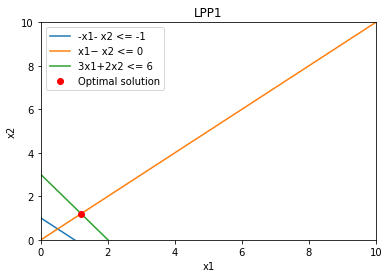

In [31]:
#To PLOT assuming that x2 is y-axis
#Extract the solution
x1,x2 = opt.x
#Define the equations for the constraints
#-𝑥1- 𝑥2 <= -1
#𝑥1− 𝑥2 ≤ 0
#3𝑥1+2𝑥2 ≤ 6
x=np.linspace(0,10,100)
eq1=(1-1*x)/1
eq2=(1*x)/1
eq3=(6-3*x)/2
#plot the feasible region
plt.plot(x,eq1,label='-x1- x2 <= -1')
plt.plot(x,eq2,label='x1− x2 <= 0')
plt.plot(x,eq3,label='3x1+2x2 <= 6')
plt.fill_between(x, np.maximum.reduce([eq1, np.full_like(x, np.nan)]), np.minimum.reduce([eq2, eq3, np.full_like(x, np.nan)]), where=(np.minimum.reduce([eq2, eq3]) >= np.maximum.reduce([eq1, np.full_like(x, np.nan)])), color='gray')

#plot the optimal solution
plt.plot(x1,x2,'ro',label='Optimal solution')

plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('LPP1')
plt.legend(loc='best')
plt.show()


**b)**

In [32]:
#max 𝑍 = -20𝑥1-30𝑥2
obj2=np.array([-20,-30])
#𝑥1+ 6𝑥2 ≤ 288
#3𝑥1+ 𝑥2 ≤ 99
lhs_ineq2=[[1,6],
          [3,1]]
rhs_ineq2=[288,99]
#𝑥1 ≥ 0, 
#𝑥2 ≥ 0
bnd2 = [(0,float('inf')), #bound of x
      (0,float('inf'))] #bound of y
opt2 = linprog(c=obj2, A_ub=lhs_ineq2, b_ub=rhs_ineq2, bounds=bnd2, method='simplex')
print(opt2)

     con: array([], dtype=float64)
     fun: -1710.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([18., 45.])


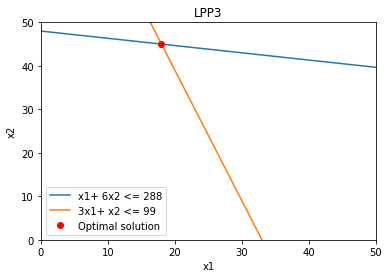

In [33]:
#To PLOT assuming that x2 is y-axis
#Extract the solution
x11,x22 = opt2.x
#Define the equations for the constraints
#𝑥1+ 6𝑥2 ≤ 288
#3𝑥1+ 𝑥2 ≤ 99
x=np.linspace(0,50,100)
eq12=(288-1*x)/6
eq22=(99-3*x)/1

#plot the feasible region
plt.plot(x,eq12,label='x1+ 6x2 <= 288')
plt.plot(x,eq22,label='3x1+ x2 <= 99')

#plt.fill_between(x, np.maximum.reduce([eq12, np.full_like(x, np.nan)]), np.minimum.reduce([eq22,np.full_like(x, np.nan)]), where=(np.minimum.reduce([eq22]) >= np.maximum.reduce([eq12, np.full_like(x, np.nan)])), color="gray")

#plot the optimal solution
plt.plot(x11,x22,'ro',label='Optimal solution')

plt.xlim(0,50)
plt.ylim(0,50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('LPP3')
plt.legend(loc='best')
plt.show()

## Linear Problem

**a) Solve the problem for 𝜇 = 0 with the linprog function from the scipy.optimize module.**

In [34]:
#FOR MAXIMIZATION WE CHANGE THE SIGN IN THE OBJECTIVE FUNCTION
#f(x) = x1 + x2
#2x1 + x2 <= 8 + 2u
#x1 + 2x2 <= 7 + 7u
#x2 <= 3 + 2u

#When using the interior-point method in linprog, it automatically converts inequality constraints into equality constraints
#using slack variables, so I don't need to add them explicitly.
u=0
objInt = [-1,-1]
A_ubInt=[[2.,1.],
       [1.,2.],
       [0.,-1.]]
b_ubInt=[8+2*u,7+7*u,3+2*u]
bndInt=[(0,float('inf')),
         (0,float('inf'))]

optCero = linprog(c=objInt, A_ub=A_ubInt, b_ub=b_ubInt, bounds=bndInt, method='interior-point')
########################################################################################################################
print(optCero)

     con: array([], dtype=float64)
     fun: -4.999999999975865
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([5.14326359e-11, 2.09734452e-11, 5.00000000e+00])
  status: 0
 success: True
       x: array([3., 2.])


**b) Solve the problem for 𝜇 = 1 with linprog(..., method=’simplex’) and then
with linprog(..., method=’interior−point’). Compare the results.**

In [58]:
varList = ['x1','x2','s1','s2','s3']
objS = [-1,-1,0,0,0]
lhs_eqS=[[2.,1.,1.,0.,0.],
       [1.,2.,0.,1.,0.],
       [0.,1.,0.,0.,1.]]

u=1
rhs_eqS=[8+2*u,7+7*u,3+2*u]
bndS=[(0,float('inf')),
         (0,float('inf')),
        (0,float('inf')),
        (0,float('inf')),
        (0,float('inf'))]

#optOne = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='simplex')
#optOne_ = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='interior-point')
#print(optOne)
#print(10*'----')
#print(optOne_)
def rangeU(u,c, A_eq, b_eq, bounds):
            optOne = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='simplex')
            optOne_ = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='interior-point')    
            print(f"u: {i}")
            print(optOne)
            print(10*'----')
            print(optOne_)
            #return optOne, optOne_
rangeU(u,objS, lhs_eqS, rhs_eqS, bndS)
#print(10*'----')
#print

u: 1.9000000000000001
     con: array([0., 0., 0.])
     fun: -7.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.5, 5. , 0. , 1.5, 0. ])
----------------------------------------
     con: array([1.32043780e-08, 2.20072920e-08, 6.60218813e-09])
     fun: -7.499999983272656
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.50000000e+00, 4.99999998e+00, 1.18562185e-09, 1.50000001e+00,
       1.24624992e-08])


**c) Solve the problem for u = 0.0, 0.1, 0.2, ..., 2.0 and analyse how 𝑓 and 𝑥1, 𝑥2
change for increasing values of u.**

In [68]:
def rangeU2(u,c, A_eq, b_eq, bounds):
            optOne = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='simplex')
            optOne_ = linprog(c=objS, A_eq=lhs_eqS, b_eq=rhs_eqS, bounds=bndS, method='interior-point')    
            return optOne, optOne_
uRange = np.arange(0.1, 2.0, 0.1)

for i in uRange:
    optOne, optOne_ = rangeU2(i,objS, lhs_eqS, rhs_eqS, bndS)
    print(f"u: {i}")
    print('Method=Simplex')
    print(optOne)
    print(10*'----')
    print('Method=Interior-Point')
    print(optOne_)

u: 0.1
Method=Simplex
     con: array([0., 0., 0.])
     fun: -7.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.5, 5. , 0. , 1.5, 0. ])
----------------------------------------
Method=Interior-Point
     con: array([1.32043780e-08, 2.20072920e-08, 6.60218813e-09])
     fun: -7.499999983272656
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.50000000e+00, 4.99999998e+00, 1.18562185e-09, 1.50000001e+00,
       1.24624992e-08])
u: 0.2
Method=Simplex
     con: array([0., 0., 0.])
     fun: -7.5
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2.5, 5. , 0. , 1.5, 0. ])
----------------------------------------
Method=Interior-Point
     con: array([1.32043780e-08, 2.20072920e-08, 6.60218813e-09])
     fun: -7.499